# Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines

The aim of this project is to predict whether people got H1N1 and seasonal flue vaccines using information they shared about their backgrounds, opinions, and health behaviours.

This is a Driven Data problem based on a telephone survey: National 2009 H1N1 Flu Survey (NHFS) in the USA.

The population was all persons 6 months or older living in the US. 

To read about the background to the project, visit https://www.drivendata.org/competitions/66/flu-shot-learning/data/

In-depth information about the project is available here: https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/

To get started with this project, create a Driven Data profile, enrol in this competition, and then download the data files `../data`!

# Import Modules

In [23]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Import and Inspect Data

In [3]:
# Import Data

submission_format = pd.read_csv('../data/submission_format.csv')
training_set_features = pd.read_csv('../data/training_set_features.csv')
training_set_labels = pd.read_csv('../data/training_set_labels.csv')
test_set_features = pd.read_csv('../data/test_set_features.csv')

# Submission Format

The competition requires a `.csv` file with the following:

Columns (3): respondent_id,h1n1_vaccine,seasonal_vaccine
Rows (26709 including first row specifying column labels): 0-26707 rows of values, plus row of column labels

So, the final submission requires `float64` probabilities for each respondent_id for two vaccines:

- `h1n1_vaccine`
- `seasonal_vaccine`

These are the outcome variables!

In summary, we need to build a model to predict two numeric, continuous, variables which are probabilities (`float64`).

Reading the problem description, the predictions for the two target variables should be **float probabilities** ranging from `0.0` to `1.0`.

The competition uses `ROC AUC` as its evaluation metric, which means the values we submit should be the **probabilities that a person received each vaccine**, not binary labels.

Binary labels are provided in the `training_set_labels` dataset.

Outcomes or labels are the values to predit, in this case, float probabilities. 

Predictors or features are the independent variables which explain the outcomes. 

In summary, this is a supervised learning problem, because the outcome variables are labelled. We need to build a model which predicts these labels, so that probability predictions can be made for new, unseen data. In this case, the test set - which we have available (the test set it seen), and the unseen test set used by DrivenData to evaluate our project.

In [4]:
!tail -10 ../data/submission_format.csv

53405,0.5,0.7
53406,0.5,0.7
53407,0.5,0.7
53408,0.5,0.7
53409,0.5,0.7
53410,0.5,0.7
53411,0.5,0.7
53412,0.5,0.7
53413,0.5,0.7
53414,0.5,0.7


In [5]:
!wc ../data/submission_format.csv

 26709  26709 373956 ../data/submission_format.csv


In [6]:
submission_format

respondent_id  h1n1_vaccine  seasonal_vaccine
0              26707           0.5               0.7
1              26708           0.5               0.7
2              26709           0.5               0.7
3              26710           0.5               0.7
4              26711           0.5               0.7
...              ...           ...               ...
26703          53410           0.5               0.7
26704          53411           0.5               0.7
26705          53412           0.5               0.7
26706          53413           0.5               0.7
26707          53414           0.5               0.7

[26708 rows x 3 columns]

In [7]:
# Respondent ID: int64 dtype
submission_format['respondent_id']

0        26707
1        26708
2        26709
3        26710
4        26711
         ...  
26703    53410
26704    53411
26705    53412
26706    53413
26707    53414
Name: respondent_id, Length: 26708, dtype: int64

In [8]:
# h1n1_vaccine: float64 dtype

submission_format['h1n1_vaccine']

0        0.5
1        0.5
2        0.5
3        0.5
4        0.5
        ... 
26703    0.5
26704    0.5
26705    0.5
26706    0.5
26707    0.5
Name: h1n1_vaccine, Length: 26708, dtype: float64

In [9]:
# seasonal_vaccine: float64 dtype
submission_format['seasonal_vaccine']

0        0.7
1        0.7
2        0.7
3        0.7
4        0.7
        ... 
26703    0.7
26704    0.7
26705    0.7
26706    0.7
26707    0.7
Name: seasonal_vaccine, Length: 26708, dtype: float64

In [10]:
training_set_features

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  ...             income_poverty  marital_status  \
0                        1.0  ...              Below Poverty     Not Married   
1                        1.0  ...              Below Poverty     Not Married   
2                        0.0  ...  <= $75,000, Above Poverty     Not Married   
3                        0.0  ...              Below Poverty     Not Married   
4                        1.0  ...  <= $75,000, Above Poverty         Married   
...                      ...  ...                        ...             ...   
26702                    0.0  ...  <= $75,000, Above Poverty     Not Married   
26703                    0.0  ...  <= $75,000, Above Poverty     Not Married   
26704                    1.0  ...                        NaN     Not Married   
26705                    NaN  ...  <= $75,000, Above Poverty         Married   
26706                    0.0  ...  <= $75,000, Above Poverty         Married   

       rent_or_own   employment_status  hhs_geo_region  \
0              Own  Not in Labor Force        oxchjgsf   
1             Rent            Employed        bhuqouqj   
2              Own            Employed        qufhixun   
3             Rent  Not in Labor Force        lrircsnp   
4              Own            Employed        qufhixun   
...            ...                 ...             ... 

In [11]:
training_set_features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

# Training Set Features

- All the numbers, except `respondent_id` (`int`) are `floats`, but could be converted to integers (ordinal or nominal)
- There are quite a few features; these are the predictor variables
- Contains 26_707 rows, but the submission_format contains 26_708 rows. This is due to the 1st row being the column labels.

Reading the problem description, we discover:

- 35 potential predictors (`respondent_id` is a unique and random identifier)

## Binary Variables

`behavioral_antiviral_meds` - Has taken antiviral medications. (binary)
`behavioral_avoidance` - Has avoided close contact with others with flu-like symptoms. (binary)
`behavioral_face_mask` - Has bought a face mask. (binary)
`behavioral_wash_hands` - Has frequently washed hands or used hand sanitizer. (binary)
`behavioral_large_gatherings` - Has reduced time at large gatherings. (binary)
`behavioral_outside_home` - Has reduced contact with people outside of own household. (binary)
`behavioral_touch_face` - Has avoided touching eyes, nose, or mouth. (binary)
`doctor_recc_h1n1` - H1N1 flu vaccine was recommended by doctor. (binary)
`doctor_recc_seasonal` - Seasonal flu vaccine was recommended by doctor. (binary)
`chronic_med_condition` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
`child_under_6_months` - Has regular close contact with a child under the age of six months. (binary)
`health_worker` - Is a healthcare worker. (binary)
`health_insurance` - Has health insurance. (binary)

# Ordinal Variables (Scales)

`h1n1_concern` - Level of concern about the H1N1 flu.

    0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

`h1n1_knowledge` - Level of knowledge about H1N1 flu.

    0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

`opinion_h1n1_vacc_effective` - Respondent's opinion about H1N1 vaccine effectiveness.

    1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

`opinion_h1n1_risk` - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.

    1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

`opinion_h1n1_sick_from_vacc` - Respondent's worry of getting sick from taking H1N1 vaccine.

    1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

`opinion_seas_vacc_effective` - Respondent's opinion about seasonal flu vaccine effectiveness.

    1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

`opinion_seas_risk` - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.

    1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

`opinion_seas_sick_from_vacc` - Respondent's worry of getting sick from taking seasonal flu vaccine.

    1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

# Demographics

`age_group` - Age group of respondent.
`education` - Self-reported education level.
`race` - Race of respondent.
`sex` - Sex of respondent.

# Character Variables

`hhs_geo_region` - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
`employment_industry` - Type of industry respondent is employed in. Values are represented as short random character strings.
`employment_occupation` - Type of occupation of respondent. Values are represented as short random character strings.

# Discrete Variables (Counts)

`household_adults` - Number of other adults in household, top-coded to 3.
`household_children` - Number of children in household, top-coded to 3.

# Residence

`hhs_geo_region` - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
`census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

# Misc

`income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds.
`marital_status` - Marital status of respondent.
`rent_or_own` - Housing situation of respondent.
`employment_status` - Employment status of respondent.

# Training Set Labels

DataFrame with 26707 rows and 3 columns.

The columns are the same as the columns in the `submission_format.csv` file:

- `respondent_id`: integers (0-26_706)
- `h1n1_vaccine`: 0 (No) or 1 (Yes) (Boolean): whether respondent received H1N1 flu vaccine.
- `seasonal_vaccine`: 0 (No) or 1 (Yes) (Boolean): whether respondent received seasonal flue vaccine.

These are the outcome variables which are `True` or `False` for whether people did or did not get vaccines for H1N1 or seasonal flu.

The outcome variables, or dependent variables, are binary. This influences the kinds of exploratory data analysis and statistical modeling we can do.

DrivenData describes this as a **multilabel** - not multiclass - problem.

As this is a **multilabel** problem, the **probabilities for each row do not need to sum to one**.


In [12]:
training_set_labels

respondent_id  h1n1_vaccine  seasonal_vaccine
0                  0             0                 0
1                  1             0                 1
2                  2             0                 0
3                  3             0                 1
4                  4             0                 0
...              ...           ...               ...
26702          26702             0                 0
26703          26703             0                 0
26704          26704             0                 1
26705          26705             0                 0
26706          26706             0                 0

[26707 rows x 3 columns]

# Test Set Features

DataFrame with 26708 rows and 36 columns

- 26707 rows in the `training_set_features` DataFrame
- Eyeballing the DataFrame, the columns look the same as the `training_set_features`

This is the dataset we use the test our model predictions.

It would be good to have a holdout or validation set from the training set.

Leave this test set alone, until we have built and validated our model!

In [13]:
test_set_features

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              26707           2.0             2.0                        0.0   
1              26708           1.0             1.0                        0.0   
2              26709           2.0             2.0                        0.0   
3              26710           1.0             1.0                        0.0   
4              26711           3.0             1.0                        1.0   
...              ...           ...             ...                        ...   
26703          53410           1.0             1.0                        0.0   
26704          53411           3.0             1.0                        0.0   
26705          53412           0.0             1.0                        0.0   
26706          53413           3.0             1.0                        0.0   
26707          53414           2.0             1.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       1.0                   0.0                    1.0   
1                       0.0                   0.0                    0.0   
2                       0.0                   1.0                    1.0   
3                       0.0                   0.0                    0.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   0.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    1.0   
26707                   0.0                   0.0                    1.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              1.0                      0.0   
1                              0.0                      0.0   
2                              1.0                      1.0   
3                              0.0                      0.0   
4                              1.0                      1.0   
...                            ...                      ...   
26703                          0.0                      0.0   
26704                          1.0                      1.0   
26705                          0.0                      0.0   
26706                          0.0                      1.0   
26707                          0.0                      0.0   

       behavioral_touch_face  ...             income_poverty  marital_status  \
0                        1.0  ...                  > $75,000     Not Married   
1                        0.0  ...              Below Poverty     Not Married   
2                        1.0  ...                  > $75,000         Married   
3                        0.0  ...  <= $75,000, Above Poverty         Married   
4                        1.0  ...  <= $75,000, Above Poverty     Not Married   
...                      ...  ...                        ...             ...   
26703                    1.0  ...                        NaN             NaN   
26704                    1.0  ...              Below Poverty         Married   
26705                    0.0  ...              Below Poverty     Not Married   
26706                    0.0  ...  <= $75,000, Above Poverty         Married   
26707                    1.0  ...                        NaN     Not Married   

       rent_or_own   employment_status  hhs_geo_region  \
0             Rent            Employed        mlyzmhmf   
1             Rent            Employed        bhuqouqj   
2              Own            Employed        lrircsnp   
3              Own  Not in Labor Force        lrircsnp   
4              Own            Employed        lzgpxyit   
...            ...                 ...             ... 

# Summarise Datasets and Data Types

In [14]:
from ydata_profiling import ProfileReport

In [15]:
training_set_features.describe()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26707.000000  26615.000000    26591.000000               26636.000000   
mean    13353.000000      1.618486        1.262532                   0.048844   
std      7709.791156      0.910311        0.618149                   0.215545   
min         0.000000      0.000000        0.000000                   0.000000   
25%      6676.500000      1.000000        1.000000                   0.000000   
50%     13353.000000      2.000000        1.000000                   0.000000   
75%     20029.500000      2.000000        2.000000                   0.000000   
max     26706.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0.253429               0.379448   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                  26620.00000             26625.000000   
mean                       0.35864                 0.337315   
std                        0.47961                 0.472802   
min                        0.00000                 0.000000   
25%                        0.00000                 0.000000   
50%                        0.00000                 0.000000   
75%                        1.00000                 1.000000   
max                        1.00000                 1.000000   

       behavioral_touch_face  ...  health_worker  health_insurance  \
count           26579.000000  ...   25903.000000       14433.00000   
mean                0.677264  ...       0.111918           0.87972   
std                 0.467531  ...       0.315271           0.32530   
min                 0.000000  ...       0.000000           0.00000   
25%                 0.000000  ...       0.000000           1.00000   
50%                 1.000000  ...       0.000000           1.00000   
75%                 1.000000  ...       0.000000           1.00000   
max                 1.000000  ...       1.000000           1.00000   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count                 26316.000000       26319.000000   
mean                      3.850623           2.342566   
std                       1.007436           1.285539   
min                       1.000000           1.000000   
25%                       3.000000           1.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count                 26312.000000                 26245.000000   
mean                      2.357670                     4.025986   
std                       1.362766                     1.086565   
min                       1.000000                     1.000000   
25%                       1.000000                     4.000000   
50%                       2.000000                     4.000000   
75%                       4.000000                     5.000000   
max                       5.000000                     5.000000   

       opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
count       26193.000000                 26170.000000      26458.000000   
mean            2.719162                     2.118112          0.886499   
std             1.385055                     1.332

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

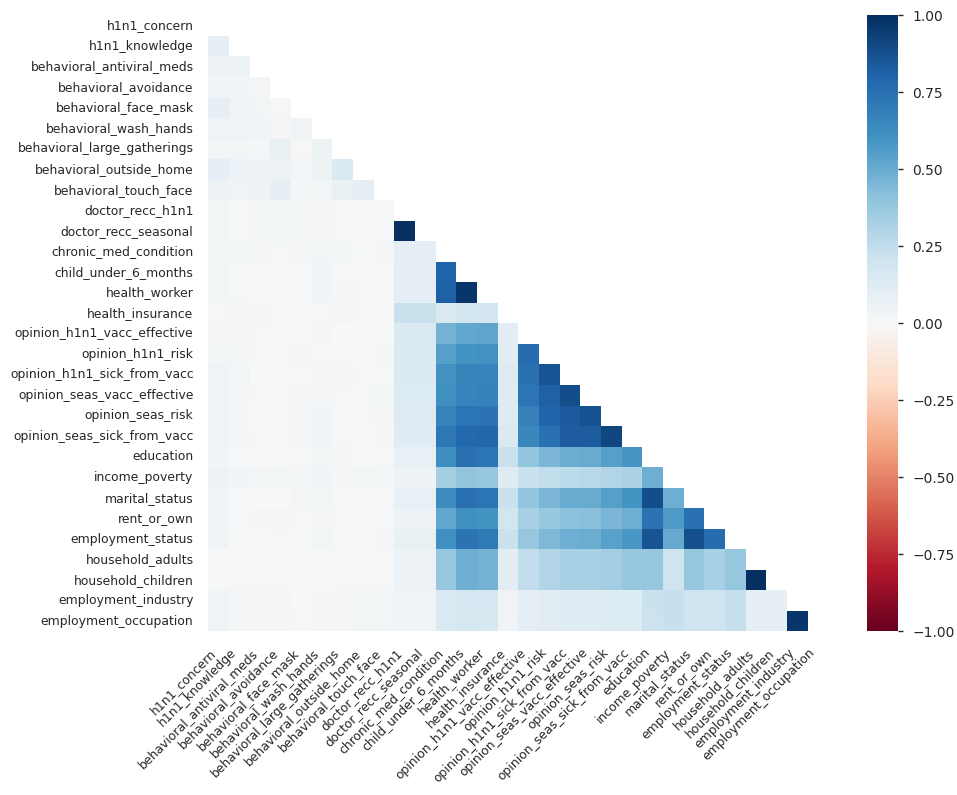

In [16]:
profile = ProfileReport(training_set_features, title="Profiling Report")
profile

In [17]:
training_set_labels.describe()

respondent_id  h1n1_vaccine  seasonal_vaccine
count   26707.000000  26707.000000      26707.000000
mean    13353.000000      0.212454          0.465608
std      7709.791156      0.409052          0.498825
min         0.000000      0.000000          0.000000
25%      6676.500000      0.000000          0.000000
50%     13353.000000      0.000000          0.000000
75%     20029.500000      0.000000          1.000000
max     26706.000000      1.000000          1.000000

In [18]:
profile = ProfileReport(training_set_labels, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
test_set_features.describe()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26708.000000  26623.000000    26586.000000               26629.000000   
mean    40060.500000      1.623145        1.266042                   0.049645   
std      7710.079831      0.902755        0.615617                   0.217215   
min     26707.000000      0.000000        0.000000                   0.000000   
25%     33383.750000      1.000000        1.000000                   0.000000   
50%     40060.500000      2.000000        1.000000                   0.000000   
75%     46737.250000      2.000000        2.000000                   0.000000   
max     53414.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26495.000000          26689.000000           26668.000000   
mean               0.729798              0.069279               0.826084   
std                0.444072              0.253934               0.379045   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                 26636.000000             26626.000000   
mean                      0.351517                 0.337227   
std                       0.477453                 0.472772   
min                       0.000000                 0.000000   
25%                       0.000000                 0.000000   
50%                       0.000000                 0.000000   
75%                       1.000000                 1.000000   
max                       1.000000                 1.000000   

       behavioral_touch_face  ...  health_worker  health_insurance  \
count           26580.000000  ...   25919.000000      14480.000000   
mean                0.683747  ...       0.111501          0.887914   
std                 0.465022  ...       0.314758          0.315483   
min                 0.000000  ...       0.000000          0.000000   
25%                 0.000000  ...       0.000000          1.000000   
50%                 1.000000  ...       0.000000          1.000000   
75%                 1.000000  ...       0.000000          1.000000   
max                 1.000000  ...       1.000000          1.000000   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count                 26310.000000       26328.000000   
mean                      3.844622           2.326838   
std                       1.007570           1.275636   
min                       1.000000           1.000000   
25%                       3.000000           1.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count                 26333.000000                 26256.000000   
mean                      2.360612                     4.024832   
std                       1.359413                     1.083204   
min                       1.000000                     1.000000   
25%                       1.000000                     4.000000   
50%                       2.000000                     4.000000   
75%                       4.000000                     5.000000   
max                       5.000000                     5.000000   

       opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
count       26209.000000                 26187.000000      26483.000000   
mean            2.708688                     2.143392          0.894310   
std             1.376045                     1.339

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

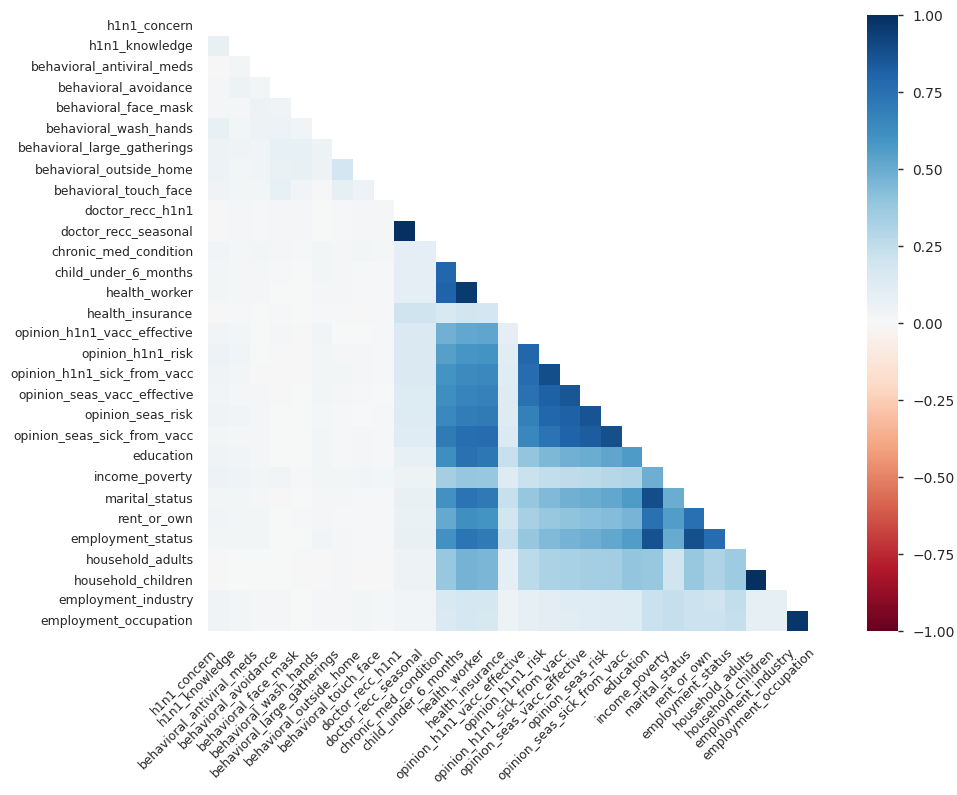

In [20]:
profile = ProfileReport(test_set_features, title="Profiling Report")
profile

# Missing Values

I discovered the ordinal/categorical variables could not be converted to integers, due to the presence of NaNs

So, then I investigated NaNs in the data

# Check NaN (Not A Number) Values

In [21]:
nan_count_per_column = training_set_features.isna().sum()

total_nan_count = training_set_features.isna().sum().sum()
print(total_nan_count)

60762


# Plot Missing Values

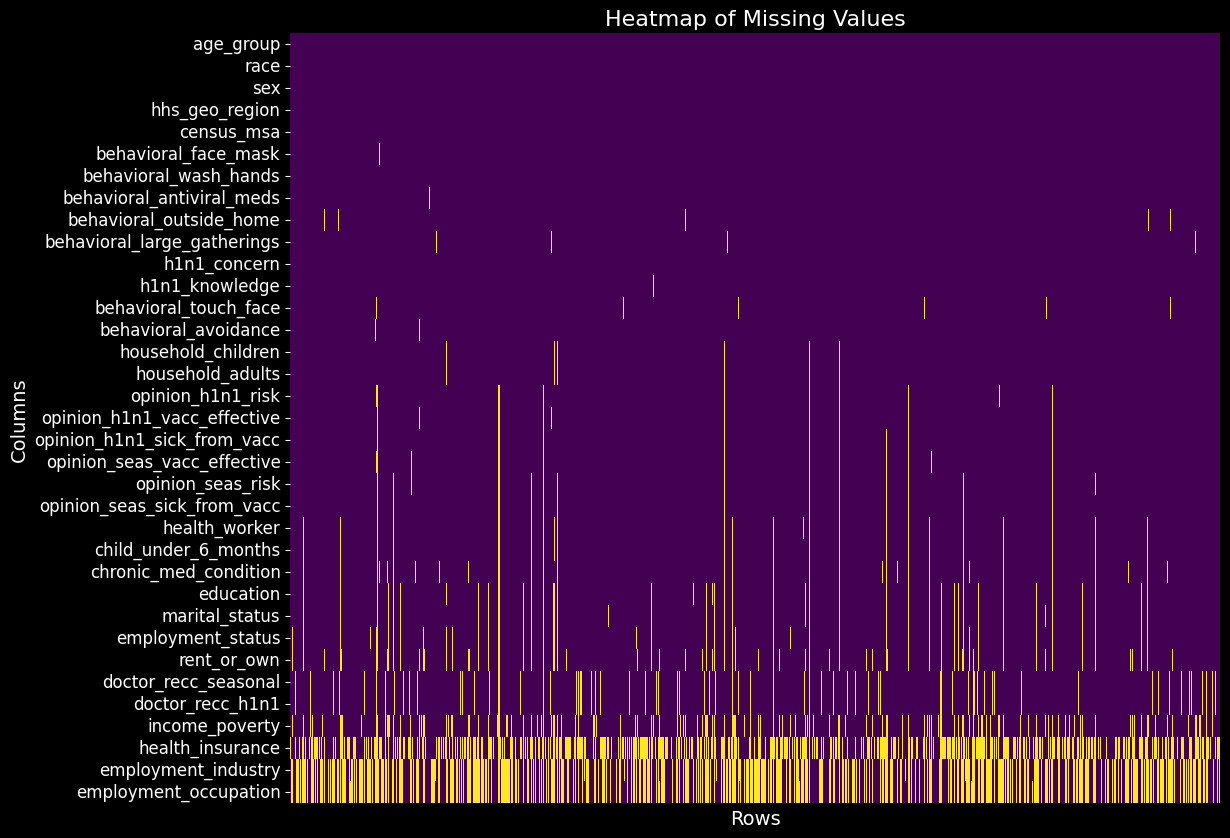

In [24]:
# Create a boolean DataFrame of missing values for all columns except 'respondent_id'
missing_values = training_set_features.drop(columns=['respondent_id']).isna()

# Calculate the sum of missing values for each variable and sort them in ascending order
sorted_columns = missing_values.sum().sort_values().index

# Reorder the missing_values DataFrame based on the sorted variables
sorted_missing_values = missing_values[sorted_columns]

# Create the figure and axis for the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
ax = sns.heatmap(sorted_missing_values.T, cbar=False, xticklabels=False, cmap='viridis')

# Set the background color of the figure (outside the heatmap)
plt.gcf().set_facecolor('black')

# Set the title and labels with white text
plt.title('Heatmap of Missing Values', color='white', fontsize=16)
plt.xlabel('Rows', color='white', fontsize=14)
plt.ylabel('Columns', color='white', fontsize=14)

# Set tick colors to white and increase font size for better readability
ax.tick_params(axis='y', colors='white', labelsize=12)

# Set the color of the axis (spine) to white
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Optionally, rotate the y-axis labels for better readability if needed
plt.yticks(rotation=0)

# Save the figure with a black background
plt.savefig('../images/nan_heatmap.png', facecolor='black', bbox_inches='tight', pad_inches=1.0)
plt.show()




# Evaluation Metric

This competition uses `ROC AUC` to evaluate performance.

`ROC AUC` is Receiver Operating Characteristic Curve.

The `ROC AUC` should be provided for each of the target variables - `h1n1_vaccine` and `seasonal_vaccine`. 

The mean of these two scores will be the overall score. A higher value indicates stronger performance.

We're advised to use `sklearn.metrics.roc_auc_score` for this multi-label problem, using the default `average=macro` parameter.

The primary evaluation metric is Area Under the Receiver Operating Characteristic Curve (AUROC or AUC).

This metric is calculated for each label in the submission and then averaged across the labels. 

AUCROC ranges from 0 to 1. The goal is to maximize AUROC.

$$
AUROC = \int_{\infty}^{-\infty} \mbox{TPR}(T) \mbox{FPR}'(T) \, dT
$$

For more information on AUCROC:

https://en.wikipedia.org/wiki/Receiver_operating_characteristic
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html




# TODO

## Essential

- Create a validation or holdout set from the training set
- Find questions asked on the survey
- Check data values and data types
- Convert and transform data
- Build quickest model and submit result
- Revise ROC AUC evaluation metric using help.
- Clarify if the ROC AUC values are included in the submission `.csv` file, or are these values to calculate the performance of our model (and we should calculate).
- Import and inspect data
- Exploratory Data Analysis, starting with features, to notice any class imbalance, which would influence sampling from training set for validation (holdout) set.
- Build baseline model: simple as possible and good enough!
- Submit result
- Find NaN or missing or extreme/outlier values.

## Nice to have

- Streamlit  
- GitHub repository